# SciML simple pinn example from SciML book

This is (almost) one of the examples from (chapter 3 of the SciML book}[https://book.sciml.ai/notes/03-Introduction_to_Scientific_Machine_Learning_through_Physics-Informed_Neural_Networks/]  

In [1]:
# Packages
using Pkg
Pkg.activate(".")
#Pkg.instantiate()
using Flux
using Statistics
using Plots


  Activating project at `~/src_nobackup/julia_ml_tests.jl.git`


In [17]:

NNODE = Chain(x -> [x], # Take in a scalar and transform it into an array
           Dense(1 => 32,tanh),
           Dense(32 => 1),
           first) # Take first value, i.e. return a scalar
NNODE(1.0)

# g(t) is the estimate of the solution
g(t) = t*NNODE(t) + 1f0

ϵ = sqrt(eps(Float32))
loss() = mean(abs2(((g(t+ϵ)-g(t))/ϵ) + g(t) + sin(2π*t)) for t in 0:1f-2:1f0)

opt = Flux.Adam(0.01)
data = Iterators.repeated((), 1000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 100 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)


2.4886568820158748

0.2079405830022352

0.2049674211915145

0.1985835692477092

0.18730645922752912

0.17108333224854116

0.105867432243646

0.007766429553669134

0.0021704199848088888

0.0008856160652219314

0.0006247901826787926

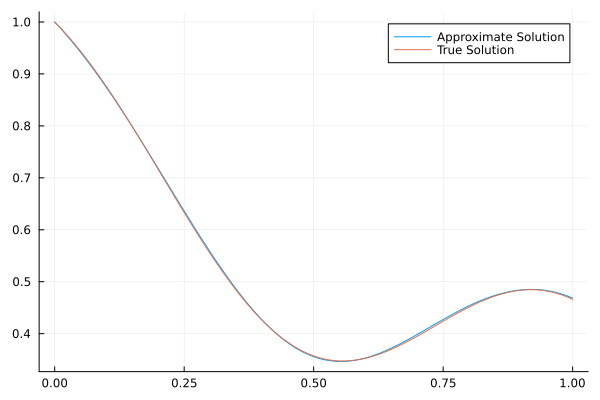

In [18]:
# with the help of Wofram alpha
g_true(t)= (exp(-t)*(-exp(t)*sin(2π*t) + 2π*exp(t)*cos(2π*t) + 4*π^2 - 2π + 1))/(1 + 4*π^2)

# plot the approximate and analytical solution
t = 0:0.001:1.0
plot(t,g.(t),label="Approximate Solution")
plot!(t,g_true.(t), label = "True Solution")